In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
sound_file = './sound/beep-01a.wav'

In [2]:
df = pd.read_csv('FACTDATA_MAR2017.txt')

D:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,AA00,11,K,21,15,J,0905,1,GS-15,P,XXXX,8,30,F,1,201703,1,161900.0,42.4
1,AA00,11,G,15,NaN,D,0301,2,ES-**,Q,XXXX,2,50,F,1,201703,1,172100.0,7.4
2,AA00,11,H,15,NaN,G,0905,1,ES-**,Q,XXXX,2,50,F,1,201703,1,172100.0,24.2
3,AA00,11,C,15,12,A,0905,1,GS-12,G,XXXX,8,30,F,1,201703,1,79720.0,0.9
4,AA00,11,C,15,12,A,0905,1,GS-12,G,XXXX,8,30,F,1,201703,1,79720.0,0.8


In [4]:
df.shape

(2087715, 19)

In [5]:
df.dtypes

AGYSUB         object
LOC            object
AGELVL         object
EDLVL          object
GSEGRD         object
LOSLVL         object
OCC            object
PATCO           int64
PPGRD          object
SALLVL         object
STEMOCC        object
SUPERVIS       object
TOA            object
WORKSCH        object
WORKSTAT        int64
DATECODE        int64
EMPLOYMENT      int64
SALARY        float64
LOS           float64
dtype: object

In [6]:
# fix datatypes
column_names = df.columns.values
column_datatypes = {}
for i in range(16):
    column_datatypes[column_names[i]] = str
column_datatypes[column_names[16]] = np.int64
for i in range(17, 19):
    column_datatypes[column_names[i]] = np.float64
print len(column_datatypes)

19


** The dataframe is explored and its columns are converted to be of proper datatypes **

In [7]:
#df = df.astype(column_datatypes)
df = pd.read_csv('FACTDATA_MAR2017.txt', dtype=column_datatypes)

In [8]:
df.shape

(2087715, 19)

In [9]:
df.dtypes

AGYSUB         object
LOC            object
AGELVL         object
EDLVL          object
GSEGRD         object
LOSLVL         object
OCC            object
PATCO          object
PPGRD          object
SALLVL         object
STEMOCC        object
SUPERVIS       object
TOA            object
WORKSCH        object
WORKSTAT       object
DATECODE       object
EMPLOYMENT      int64
SALARY        float64
LOS           float64
dtype: object

** Above are the datatypes of all columns of the dataset **

In [10]:
df.nunique()

AGYSUB           531
LOC              221
AGELVL            12
EDLVL             23
GSEGRD            16
LOSLVL            11
OCC              683
PATCO              7
PPGRD           1008
SALLVL            19
STEMOCC          101
SUPERVIS           7
TOA               20
WORKSCH           11
WORKSTAT           2
DATECODE           1
EMPLOYMENT         1
SALARY        119456
LOS              636
dtype: int64

In [11]:
np.unique(df.WORKSTAT)

array(['1', '2'], dtype=object)

In [12]:
np.unique(df.WORKSCH)

array(['*', 'B', 'F', 'G', 'I', 'J', 'P', 'Q', 'R', 'S', 'T'], dtype=object)

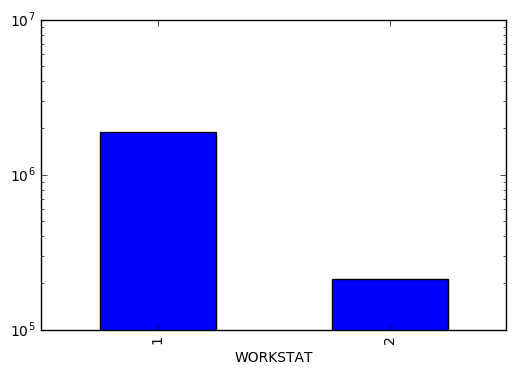

   WORKSTAT                         WORKSTATT
0         1  Non-Seasonal Full Time Permanent
1         2                   Other Employees


In [13]:
# Distribution of working status
translation_filename = 'DTwkstat.txt'
plt.figure()
df.groupby('WORKSTAT').size().plot.bar()
plt.yscale("log")

plt.show()
print pd.read_csv(translation_filename)

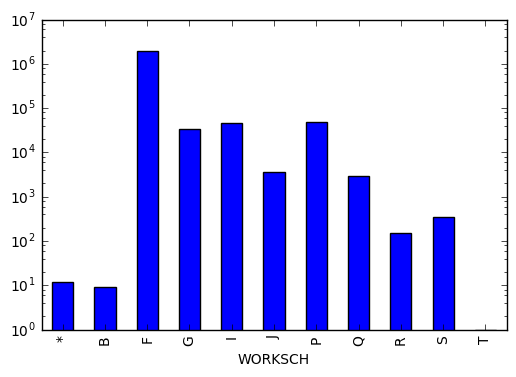

    WSTYP         WSTYPT WORKSCH                              WORKSCHT
0       1      Full-time       B  B - Full-time Nonseasonal Baylor Pln
1       1      Full-time       F             F - Full-time Nonseasonal
2       1      Full-time       G                G - Full-time Seasonal
3       1      Full-time       H                 H - Full-time On-call
4       2  Not Full-time       I          I - Intermittent Nonseasonal
5       2  Not Full-time       J             J - Intermittent Seasonal
6       2  Not Full-time       P             P - Part-time Nonseasonal
7       2  Not Full-time       Q                Q - Part-time Seasonal
8       2  Not Full-time       R                 R - Part-time On-call
9       2  Not Full-time       S  S - Part-time Job Sharer Nonseasonal
10      2  Not Full-time       T     T - Part-time Job Sharer Seasonal
11      3    Unspecified       *                       * - Unspecified


In [14]:
translation_filename = 'DTwrksch.txt'
#translation = pd.read_csv(translation_filename)
plt.figure()
df.groupby('WORKSCH').size().plot.bar()
plt.yscale("log")
plt.show()
print pd.read_csv(translation_filename)

** An overwhelming proportion of employees are "F", or full-time nonseasonal employees, followed by "P (part-time nonseasonal)", "I (intermittent nonseasonal)" and "G (full-time seasonal)", and further followed by "J (intermittent nonseasonal)" and "Q (part-time seasonal)" **

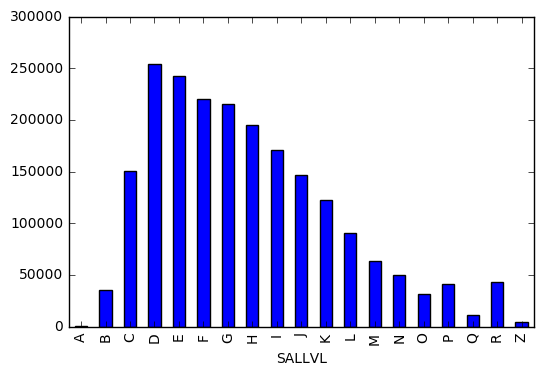

   SALLVL              SALLVLT
0       A    Less than $20,000
1       B    $20,000 - $29,999
2       C    $30,000 - $39,999
3       D    $40,000 - $49,999
4       E    $50,000 - $59,999
5       F    $60,000 - $69,999
6       G    $70,000 - $79,999
7       H    $80,000 - $89,999
8       I    $90,000 - $99,999
9       J  $100,000 - $109,999
10      K  $110,000 - $119,999
11      L  $120,000 - $129,999
12      M  $130,000 - $139,999
13      N  $140,000 - $149,999
14      O  $150,000 - $159,999
15      P  $160,000 - $169,999
16      Q  $170,000 - $179,999
17      R     $180,000 or more
18      Z  Unspecified or Zero


In [15]:
translation_filename = 'DTsallvl.txt'
#translation = pd.read_csv(translation_filename)
plt.figure()
df.groupby('SALLVL').size().plot.bar()
#plt.yscale("log")
plt.show()
print pd.read_csv(translation_filename)

** Salary levels follow a distribution that is skewed to the right. The mode lies at \$40,000 - $49,000 and the number of employees at each salary level drops uniformly ** 

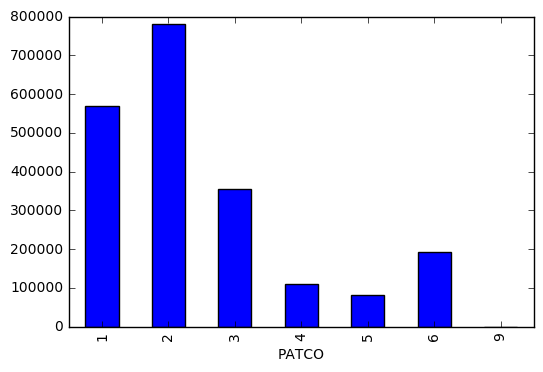

   PATCO              PATCOT
0      1        Professional
1      2      Administrative
2      3           Technical
3      4            Clerical
4      5  Other White Collar
5      6         Blue Collar
6      9         Unspecified


In [16]:
# Next, occupation category
translation_filename = 'DTpatco.txt'
#translation = pd.read_csv(translation_filename)
plt.figure()
df.groupby('PATCO').size().plot.bar()
#plt.yscale("log")
plt.show()
print pd.read_csv(translation_filename)

** Most employees are administrators, followed by profesisonals and technicians. **

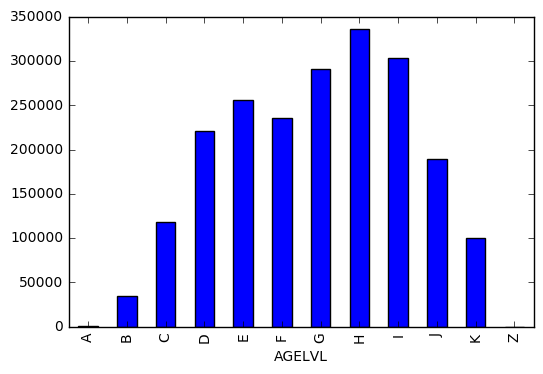

   AGELVL       AGELVLT
0       A  Less than 20
1       B         20-24
2       C         25-29
3       D         30-34
4       E         35-39
5       F         40-44
6       G         45-49
7       H         50-54
8       I         55-59
9       J         60-64
10      K    65 or more
11      Z   Unspecified


In [17]:
# After that, age level
translation_filename = 'DTagelvl.txt'
#translation = pd.read_csv(translation_filename)
plt.figure()
df.groupby('AGELVL').size().plot.bar()
#plt.yscale("log")
plt.show()
print pd.read_csv(translation_filename)

** The age levels shows a bimodal distribution, with local maxima at 35-39 and 50-54 **

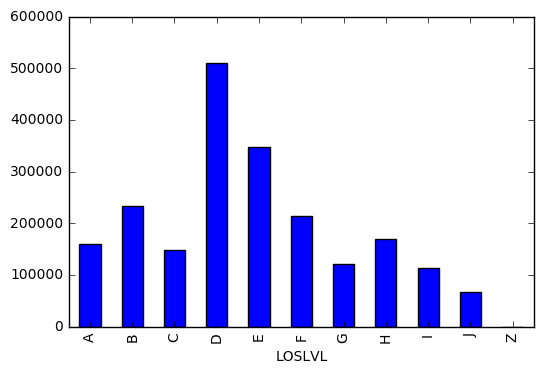

   LOSLVL           LOSLVLT
0       A  Less than 1 year
1       B       1 - 2 years
2       C       3 - 4 years
3       D       5 - 9 years
4       E     10 - 14 years
5       F     15 - 19 years
6       G     20 - 24 years
7       H     25 - 29 years
8       I     30 - 34 years
9       J  35 years or more
10      Z       Unspecified


In [18]:
# Next, length of service
translation_filename = 'DTloslvl.txt'
#translation = pd.read_csv(translation_filename)
plt.figure()
df.groupby('LOSLVL').size().plot.bar()
#plt.yscale("log")
plt.show()
print pd.read_csv(translation_filename)

** The distribution for length-of-service levels is actually trimodal, with peaks at 1-2 years, 5-9 years and 25-29 years **

In [19]:
np.unique(df.SUPERVIS.apply(str))

array(['*', '2', '4', '5', '6', '7', '8'], dtype=object)

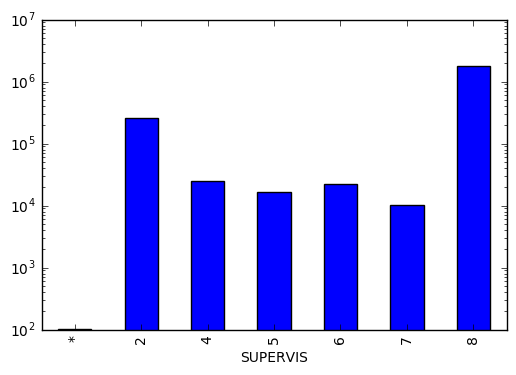

   SUPERTYP       SUPERTYPT SUPERVIS                     SUPERVIST
0         1      Supervisor        2       2-SUPERVISOR OR MANAGER
1         2          Leader        6                      6-LEADER
2         2          Leader        7                 7-TEAM LEADER
3         3  Non-Supervisor        4           4-SUPERVISOR (CSRA)
4         3  Non-Supervisor        5  5-MANAGEMENT OFFICIAL (CSRA)
5         3  Non-Supervisor        8         8-ALL OTHER POSITIONS
6         4     Unspecified        *                 *-UNSPECIFIED


In [20]:
# Next, supervisory status
translation_filename = 'DTsuper.txt'
#translation = pd.read_csv(translation_filename)
plt.figure()
# Standardize entry type
# df.SUPERVIS = df.SUPERVIS.apply(str)
df.groupby('SUPERVIS').size().plot.bar()
plt.yscale("log")
plt.show()
print pd.read_csv(translation_filename)

** There are apparently many supervisors compared to leaders. But not enough is known about their organizational structure to draw any significant conclusions **

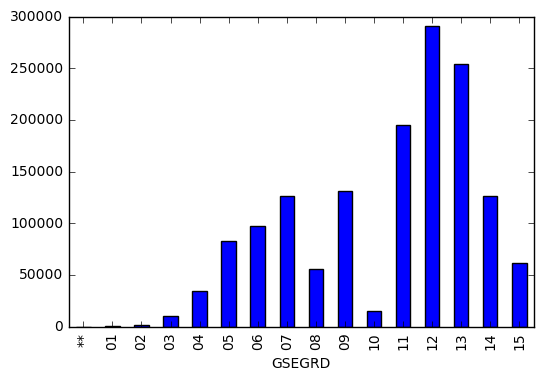

   GSEGRD
0      **
1      01
2      02
3      03
4      04
5      05
6      06
7      07
8      08
9      09
10     10
11     11
12     12
13     13
14     14
15     15


In [21]:
# Next, general schedule and equivalent grade
translation_filename = 'DTgsegrd.txt'
#translation = pd.read_csv(translation_filename)
plt.figure()
# Standardize entry type
# df.SUPERVIS = df.SUPERVIS.apply(str)
df.groupby('GSEGRD').size().plot.bar()
#plt.yscale("log")
plt.show()
print pd.read_csv(translation_filename)

** Not familiar enough with the US general schedule system to draw conclusion about the distribution **

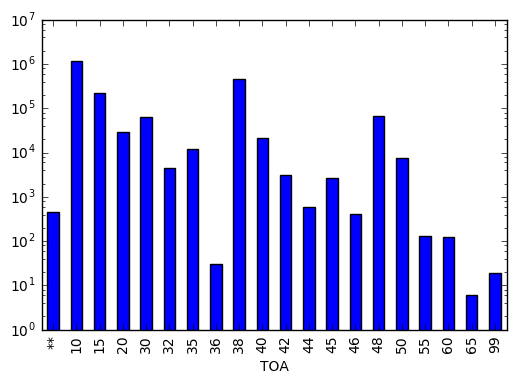

    TOATYP        TOATYPT TOA                                             TOAT
0        1      Permanent  10                  10-Competitive Service - Career
1        1      Permanent  15      15-Competitive Service - Career-Conditional
2        1      Permanent  30                 30-Excepted Service - Schedule A
3        1      Permanent  32                 32-Excepted Service - Schedule B
4        1      Permanent  34                 34-Excepted Service - Schedule C
5        1      Permanent  35                 35-Excepted Service - Schedule D
6        1      Permanent  36                  36-Excepted Service - Executive
7        1      Permanent  38                      38-Excepted Service - Other
8        1      Permanent  50             50-Senior Executive Service - Career
9        1      Permanent  55         55-Senior Executive Service - Non-Career
10       1      Permanent  99                                   **-Unspecified
11       2  Non-permanent  20                       

In [22]:
# Next, type of appointment
translation_filename = 'DTtoa.txt'
#translation = pd.read_csv(translation_filename)
plt.figure()
# Standardize entry type
# df.SUPERVIS = df.SUPERVIS.apply(str)
df.groupby('TOA').size().plot.bar()
plt.yscale("log")
plt.show()
print pd.read_csv(translation_filename)

** While this column may contain interesting information about the civil service system, it may be less relevant to our study because first, the system is a specialty of the US civil service system, but we work with private companies, and second, I don't expect there to be substantial difference in opportunity for the employees to get insurance benefits **

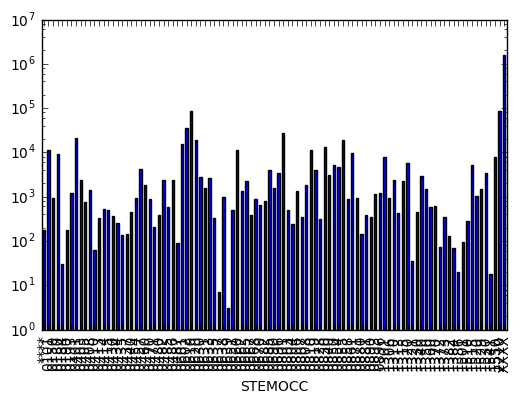

     STEMAGG               STEMAGGT  STEMTYP                 STEMTYPT STEMOCC  \
0          1       STEM OCCUPATIONS        1      SCIENCE OCCUPATIONS    0101   
1          1       STEM OCCUPATIONS        1      SCIENCE OCCUPATIONS    0150   
2          1       STEM OCCUPATIONS        1      SCIENCE OCCUPATIONS    0180   
3          1       STEM OCCUPATIONS        1      SCIENCE OCCUPATIONS    0184   
4          1       STEM OCCUPATIONS        1      SCIENCE OCCUPATIONS    0190   
5          1       STEM OCCUPATIONS        1      SCIENCE OCCUPATIONS    0193   
6          1       STEM OCCUPATIONS        1      SCIENCE OCCUPATIONS    0401   
7          1       STEM OCCUPATIONS        1      SCIENCE OCCUPATIONS    0403   
8          1       STEM OCCUPATIONS        1      SCIENCE OCCUPATIONS    0405   
9          1       STEM OCCUPATIONS        1      SCIENCE OCCUPATIONS    0408   
10         1       STEM OCCUPATIONS        1      SCIENCE OCCUPATIONS    0410   
11         1       STEM OCCU

In [23]:
# Next, stem occupations
translation_filename = 'DTstemocc.txt'
#translation = pd.read_csv(translation_filename)
plt.figure()
# Standardize entry type
# df.SUPERVIS = df.SUPERVIS.apply(str)
df.groupby('STEMOCC').size().plot.bar()
plt.yscale("log")
plt.show()
print pd.read_csv(translation_filename)

** Very complicated, very specific. Probably will not yield interesting insights **

In [24]:
# It might be a good idea to start with an analysis of the vast list of agencies
agencies = pd.read_csv('DTagy.txt')

In [25]:
agencies.head(3)

,AGYTYP,AGYTYPT,AGY,AGYT,AGYSUB,AGYSUBT
0,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF02,AF02-AIR FORCE INSPECTION AGENCY (FO)
1,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF03,AF03-AIR FORCE OPERATIONAL TEST AND EVALUATION...
2,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF06,AF06-AIR FORCE AUDIT AGENCY


In [26]:
agencies.groupby('AGYTYPT').size()

AGYTYPT
Cabinet Level Agencies                                  388
Large Independent Agencies (1000 or more employees)      54
Medium Independent Agencies (100-999 employees)          33
Small Independent Agencies (less than 100 employees)     56
dtype: int64

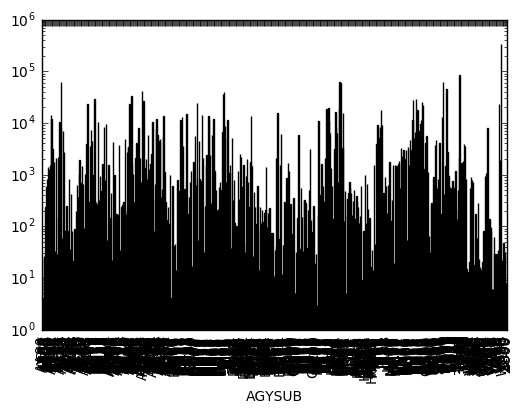

     AGYTYP                                            AGYTYPT AGY  \
0         1                             Cabinet Level Agencies  AF   
1         1                             Cabinet Level Agencies  AF   
2         1                             Cabinet Level Agencies  AF   
3         1                             Cabinet Level Agencies  AF   
4         1                             Cabinet Level Agencies  AF   
5         1                             Cabinet Level Agencies  AF   
6         1                             Cabinet Level Agencies  AF   
7         1                             Cabinet Level Agencies  AF   
8         1                             Cabinet Level Agencies  AF   
9         1                             Cabinet Level Agencies  AF   
10        1                             Cabinet Level Agencies  AF   
11        1                             Cabinet Level Agencies  AF   
12        1                             Cabinet Level Agencies  AF   
13        1         

In [27]:
# Next, agencies
translation_filename = 'DTagy.txt'
#translation = pd.read_csv(translation_filename)
plt.figure()
# Standardize entry type
# df.SUPERVIS = df.SUPERVIS.apply(str)
df.groupby('AGYSUB').size().plot.bar()
plt.yscale("log")
plt.show()
print pd.read_csv(translation_filename)

** Agencies don't seem to help either :( **

In [28]:
groupedby_loc = df[df.LOC.str.isnumeric()].groupby('LOC').size()

In [29]:
groupedby_loc.loc['02']

10969

In [30]:
#groupedby_loc = df[df.LOC.str.isnumeric()].groupby('LOC').size()
employee_concentration = df[df.LOC.str.isnumeric()].LOC.apply(lambda x: 'low' if groupedby_loc.loc[x] < 35000 else 'medium' if groupedby_loc.loc[x] < 80000 else 'high')

In [31]:
loc_df = pd.read_csv('DTloc.txt')

low_states = np.unique(df[(df.LOC.str.isnumeric()) & (employee_concentration == 'low')].LOC.values)
loc_df[loc_df.LOC.isin(low_states)]

,LOCTYP,LOCTYPT,LOC,LOCT
1,1,United States,02,02-ALASKA
2,1,United States,04,04-ARIZONA
3,1,United States,05,05-ARKANSAS
6,1,United States,09,09-CONNECTICUT
7,1,United States,10,10-DELAWARE
11,1,United States,15,15-HAWAII
12,1,United States,16,16-IDAHO
14,1,United States,18,18-INDIANA
15,1,United States,19,19-IOWA
16,1,United States,20,20-KANSAS


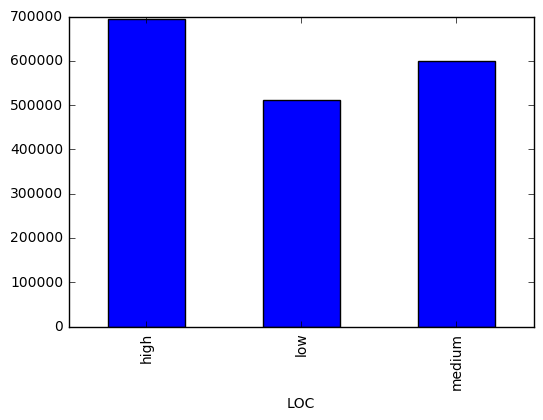

In [32]:
employee_concentration.groupby(employee_concentration).size().plot.bar()
plt.show()

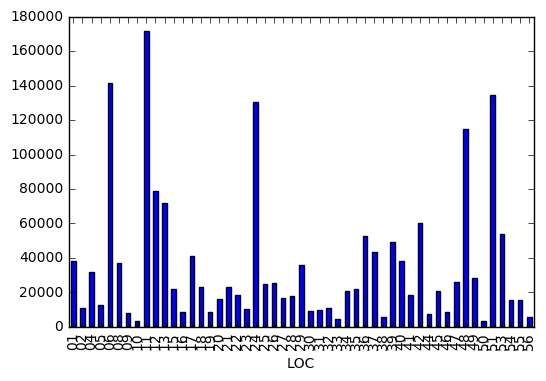

    LOCTYP        LOCTYPT LOC                     LOCT
0        1  United States  01               01-ALABAMA
1        1  United States  02                02-ALASKA
2        1  United States  04               04-ARIZONA
3        1  United States  05              05-ARKANSAS
4        1  United States  06            06-CALIFORNIA
5        1  United States  08              08-COLORADO
6        1  United States  09           09-CONNECTICUT
7        1  United States  10              10-DELAWARE
8        1  United States  11  11-DISTRICT OF COLUMBIA
9        1  United States  12               12-FLORIDA
10       1  United States  13               13-GEORGIA
11       1  United States  15                15-HAWAII
12       1  United States  16                 16-IDAHO
13       1  United States  17              17-ILLINOIS
14       1  United States  18               18-INDIANA
15       1  United States  19                  19-IOWA
16       1  United States  20                20-KANSAS
17       1

In [33]:
# Try location
translation_filename = 'DTloc.txt'
#translation = pd.read_csv(translation_filename)
plt.figure()
# Standardize entry type
# df.SUPERVIS = df.SUPERVIS.apply(str)
df[df.LOC.str.isnumeric()].groupby('LOC').size().plot.bar()
#plt.yscale("log")
plt.show()
print pd.read_csv(translation_filename)[pd.read_csv(translation_filename).LOC.str.isnumeric()]

** After getting a little sense of what the dataset contains, it may be worth it to start thinking about what factors may affect insurance purchase or insurance premium **

** For starters, location, age, education level, occupation,  **